# Premiere etape  
Definir la fonction, puis la tracer


In [77]:
var('x', 'y')

f(x,y) = x*x*x + 3*x*y*y - 15*x - 12*y
f(x,y) = x*x*x*x + y*y*y*y - 4*x*y

#f est polynomiale donc de classe C_inf sur R^2

pretty_print(f)

(x, y) |--> x^4 + y^4 - 4*x*y

In [78]:
u = 5
plot3d(f , (-u, u), (-u, u))

Graphics3d Object

# Deuxieme etape  
Rechercher les point critiques -> recupère le gradient et trouver les solutions S  
S est notre ensemble de point critique  


In [8]:
der  = f.gradient()
pretty_print(der)

(x, y, z) |--> (2*x, 4*y, 6*z)

In [96]:
pointCritique = solve([der[0]==0,der[1]==0], x, y)
pretty_print(pointCritique)
mesPointsCritiques = []
for k in pointCritique:
    if k[0].right() in QQ and k[1].right() in QQ:
        mesPointsCritiques.append(k)
pretty_print(mesPointsCritiques)

[[x == sqrt(-I), y == -(-1)^(1/4)], [x == (-1)^(1/4), y == (-1)^(3/4)], [x == -I, y == I], [x == I, y == -I], [x == -1, y == -1], [x == 1, y == 1], [x == 0, y == 0]]

[[x == -1, y == -1], [x == 1, y == 1], [x == 0, y == 0]]

# 3eme Etape  
On regarde la matrice hessienne en ces points et calcule les derivées secondes   
En fonction des resultats, on peut conclure

In [98]:
#matrice hessienne en 'a'
var('a')
r = der[0].diff(x)(a)
s = der[0].diff(y)(a)
t = der[1].diff(y)(a)

H = matrix([[r,s],
     [s,t]])
pretty_print(H)

delta = r*t-s*s

[12*a^2     -4]
[    -4 12*y^2]

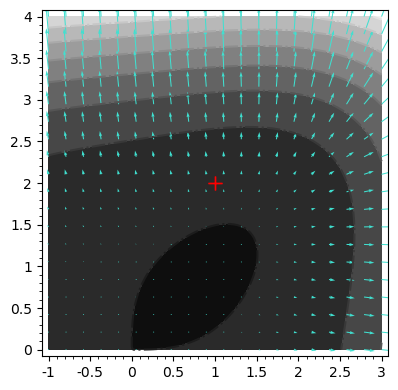

In [159]:
def affichage(f,der, a ,b, zoom=2):
    fonction(x) = b
    h = plot_vector_field(der, (x,a-zoom,a+zoom), (y,b-zoom,b+zoom), color='turquoise')
    g = contour_plot(f, (x,a-zoom,a+zoom), (y,b-zoom,b+zoom), linestyles='dashdot', fill='false')
    c = plot(fonction, a,a+0.0000001 ,marker='+' , markersize=10, plot_points=1, color='red')
    pretty_print( g+c +h)
    
affichage(f,der,1,2)

(x, y) |--> x^4 + y^4 - 4*x*y

-1 -1
Ce point critique est un MINIMUM local.



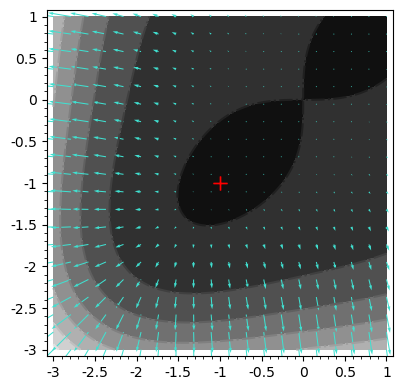

1 1
Ce point critique est un MINIMUM local.



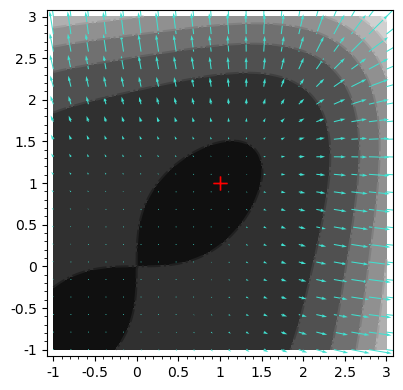

0 0
Ce point critique est un point COL.



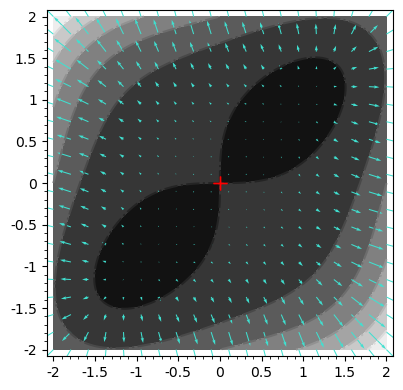

In [163]:
#appliquons delta sur tous nos point critiques
pretty_print(f)
for MonPoint in mesPointsCritiques:
    print(MonPoint[0].right(),MonPoint[1].right())
    k = delta(MonPoint[0].right(),MonPoint[1].right())
    
    if k > 0:
        if r(MonPoint[0].right()) > 0:
            print("Ce point critique est un MINIMUM local.\n")
        if r(MonPoint[0].right()) < 0:
            print("Ce point critique est un MAXIMUM local.\n")
    
    if k < 0:
        print("Ce point critique est un point COL.\n")
    if k == 0:
        print("Il nous faut une etude plus fine.\n")
    affichage(f,der,MonPoint[0].right(),MonPoint[1].right())

# Etudions une fonction de R^3

In [22]:
var('x', 'y', 'z')

f(x,y,z) = x*x + 2*y*y + 3*z*z 
f(x,y,z) = x*x + 2*y*y - 3*z*z

#f est polynomiale donc de classe C_inf sur R^3

pretty_print(f)


(x, y, z) |--> x^2 + 2*y^2 - 3*z^2

In [23]:
der  = f.gradient()
pretty_print(der)

(x, y, z) |--> (2*x, 4*y, -6*z)

In [24]:
pointCritique = solve([der[0]==0,der[1]==0,der[2]==0], x, y,z)
pretty_print(pointCritique)
mesPointsCritiques = []
for k in pointCritique:
    if k[0].right() in QQ and k[1].right() in QQ and k[2].right() in QQ:
        mesPointsCritiques.append(k)
pretty_print(mesPointsCritiques)

[[x == 0, y == 0, z == 0]]

[[x == 0, y == 0, z == 0]]

In [28]:
#matrice hessienne en 'a'
var('a')

H = matrix([[der[0].diff(x)(a),der[0].diff(y)(a),der[0].diff(z)(a)],
            [der[1].diff(x)(a),der[1].diff(y)(a),der[1].diff(z)(a)],
            [der[2].diff(x)(a),der[2].diff(y)(a),der[2].diff(z)(a)]
           ])

a = [0,0,0]
pretty_print(H(x=a[0],y=a[1],z=a[2]))

#on diagonalise et on recupère le spectre
pretty_print(H.eigenmatrix_right()[0])
valeurPropre = H.eigenvalues()
print(valeurPropre)
if valeurPropre[0] > 0 and valeurPropre[1] > 0 and valeurPropre[2] > 0 :
    print("c'est un MINIMUM local en",a )
elif valeurPropre[0] < 0 and valeurPropre[1] < 0 and valeurPropre[2] < 0 :
    print("c'est un MAXIMUM local en",a )
else:
    print("Le point",a," est COL.")

[ 2  0  0]
[ 0  4  0]
[ 0  0 -6]

[-6  0  0]
[ 0  2  0]
[ 0  0  4]

[-6, 2, 4]
Le point [0, 0, 0]  est COL.
